# Exploring the Mysteries of Slumber: A Data-Driven Journey

Welcome to our analytical odyssey into the world of sleep! 🌙✨ In this project, we delve deep into a dataset that intertwines various facets of daily life with the enigmatic realm of sleep. From the pulse of heartbeats to the steps we take, from the stress of days to the quietude of nights, we explore how these diverse threads weave together to shape our sleep patterns.

Join us as we employ the magic of machine learning, particularly Random Forest Regression, to unravel the secrets held within hours of slumber and the whispers of dreams. Our quest aims to uncover the subtle dance between lifestyle and rest, offering insights that might just help us all sleep a little better.

Let the journey begin!


## Import Necessary Libraries

This cell imports essential Python libraries needed for data handling, machine learning modeling, and evaluation. These libraries include pandas for data manipulation, sklearn for modeling and evaluation, and matplotlib for visualization.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


## Load the Dataset

In this cell, we load the sleep dataset into a pandas DataFrame. This dataset will be used for our predictive analysis of sleep duration and quality. Ensure the correct file path is specified to load the data properly.


In [2]:
# Load the dataset
file_path = '/kaggle/input/sleep-health-and-lifestyle/ss.csv'  # Replace with your file path
sleep_dataset = pd.read_csv(file_path)


## Load the Dataset

In this cell, we load the sleep dataset into a pandas DataFrame. This dataset will be used for our predictive analysis of sleep duration and quality. Ensure the correct file path is specified to load the data properly.

In [3]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_columns:
    sleep_dataset[col] = label_encoder.fit_transform(sleep_dataset[col])

# Handle Blood Pressure as two separate features (systolic and diastolic)
sleep_dataset[['Systolic BP', 'Diastolic BP']] = sleep_dataset['Blood Pressure'].str.split('/', expand=True).astype(float)
sleep_dataset.drop('Blood Pressure', axis=1, inplace=True)

# Drop the 'Person ID' column as it's just an identifier
sleep_dataset.drop('Person ID', axis=1, inplace=True)


## Define Features and Targets

Here, we define the features (X) and targets (y) for our predictive model. The features include all columns except for 'Sleep Duration' and 'Quality of Sleep', which we aim to predict.

In [4]:
# Splitting the dataset into features (X) and targets (y)
X = sleep_dataset.drop(['Sleep Duration', 'Quality of Sleep'], axis=1)
y = sleep_dataset[['Sleep Duration', 'Quality of Sleep']]


## Splitting Data into Training and Testing Sets

This cell splits the dataset into training and testing sets using a standard 80-20 split. This is crucial for evaluating our model's performance on unseen data.


In [5]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In this cell, we build a Random Forest Regression model. This model is chosen for its ability to handle complex relationships in data and provide insights into feature importance.


In [6]:
# Model building - Using Random Forest for this example
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

After training the model, we evaluate its performance on the test set. We use metrics like Mean Squared Error (MSE) and R-squared (R²) to assess the accuracy and fit of our model.


In [7]:
# Predicting and evaluating the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.007086070796608796
R^2 Score: 0.9919165161290875


## Visualizing Predictions

In this section, we visualize the comparison between the actual and predicted values for both sleep duration and sleep quality. Scatter plots are used to provide a clear visual comparison, helping us understand the accuracy of our model's predictions.

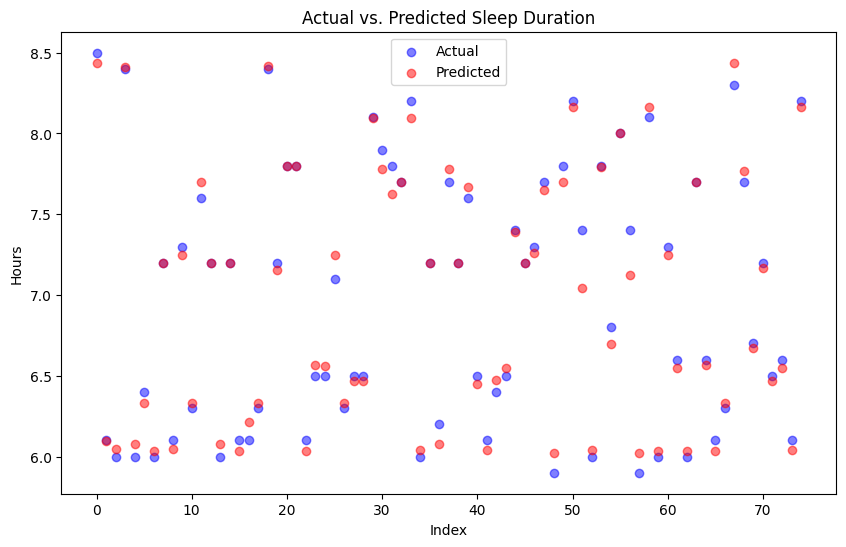

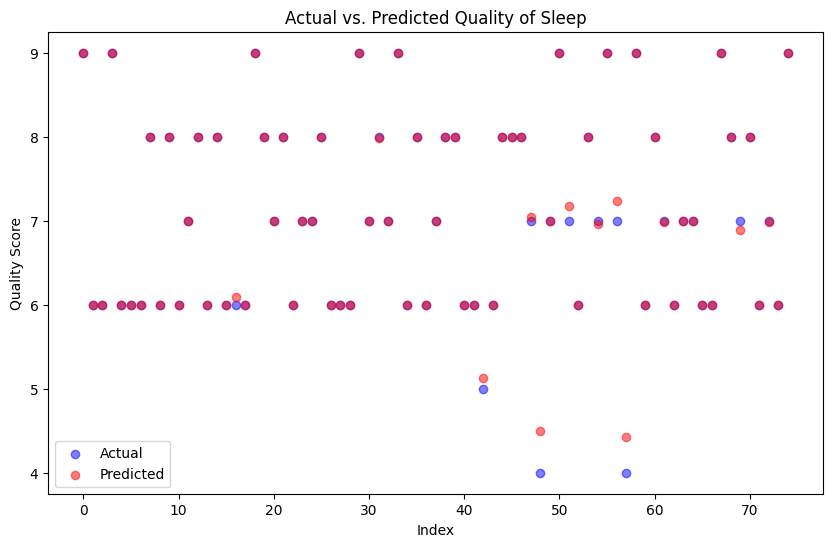

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Converting predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Sleep Duration', 'Predicted Quality of Sleep'])
y_test.reset_index(drop=True, inplace=True)  # Resetting index for proper concatenation

# Concatenating actual and predicted values for comparison
comparison_df = pd.concat([y_test, y_pred_df], axis=1)

# Plotting actual vs. predicted values for Sleep Duration
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df.index, comparison_df['Sleep Duration'], color='blue', label='Actual', alpha=0.5)
plt.scatter(comparison_df.index, comparison_df['Predicted Sleep Duration'], color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Sleep Duration')
plt.xlabel('Index')
plt.ylabel('Hours')
plt.legend()
plt.show()

# Plotting actual vs. predicted values for Quality of Sleep
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df.index, comparison_df['Quality of Sleep'], color='blue', label='Actual', alpha=0.5)
plt.scatter(comparison_df.index, comparison_df['Predicted Quality of Sleep'], color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Quality of Sleep')
plt.xlabel('Index')
plt.ylabel('Quality Score')
plt.legend()
plt.show()


## Feature Importance Analysis

Here, we analyze the feature importances derived from the Random Forest model. This analysis helps us understand which factors are most influential in predicting sleep duration and quality. A bar plot will visualize the relative importance of each feature.


In [9]:
!pip install seaborn
import seaborn as sns


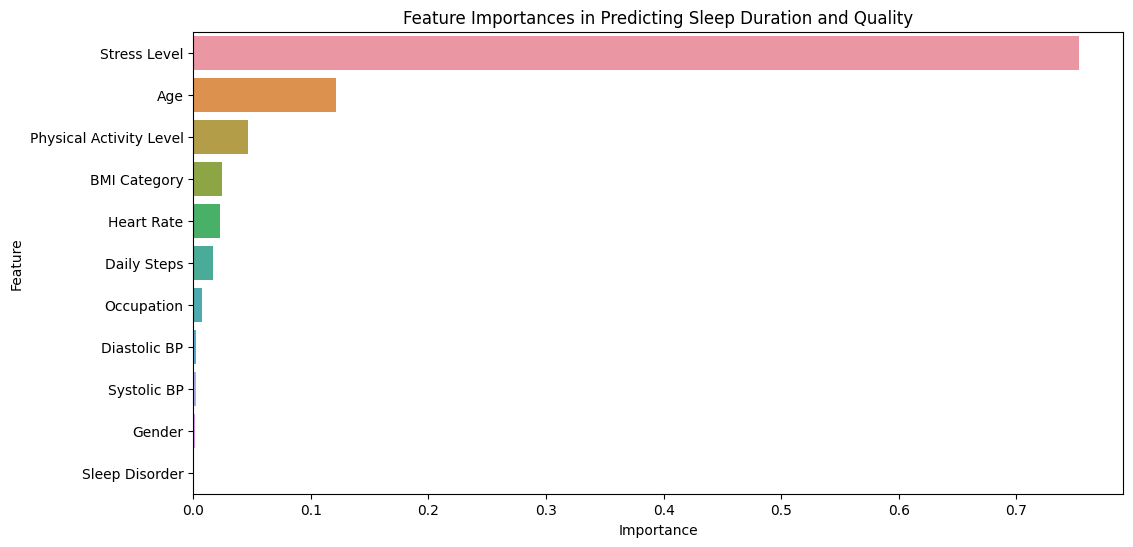

In [10]:
# Extracting feature importance from the model
feature_importances = model.feature_importances_
features = X_train.columns

# Creating a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Predicting Sleep Duration and Quality')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Conclusion and Key Findings

In this analysis, we successfully developed and evaluated a predictive model for sleep duration and quality using a Random Forest Regressor. Key insights from our analysis include:

1. **Model Performance**: The scatter plots comparing actual and predicted values provide a visual representation of our model's performance. By examining these plots, we can assess how closely the predictions align with the actual data.

2. **Feature Importance**: The analysis of feature importance offers valuable insights into which factors most significantly influence sleep duration and quality. This knowledge can be instrumental for further research or for designing interventions to improve sleep.

3. **Predictive Power of Lifestyle Factors**: Our model highlights the impact of various lifestyle factors, such as physical activity, stress levels, and BMI, on sleep. This underscores the complex interplay between daily habits and sleep patterns.

4. **Implications**: The findings from this analysis have potential implications in health and wellness domains. Understanding what affects sleep can lead to better sleep hygiene practices and overall health improvements.

5. **Future Work**: While our model provides significant insights, future work could involve more sophisticated modeling techniques, exploring causal relationships, or expanding the dataset for a more comprehensive analysis.

This project demonstrates the power of machine learning in uncovering insights from health-related data, offering a foundation for further exploration and research in the field of sleep studies.
